In [1]:
import pandas as pd
A = pd.read_excel("./data/Data_Methodes_Factorielles.xlsx",sheet_name="AUTOS_MDS_SOURCE",index_col=0)
display(A)

,CYL,PUISS,LONG,LARG,POIDS,VMAX
Modele,,,,,,
Toyota Corolla,1166,55,399,157,815,140
Lada 1300,1294,68,404,161,955,140
Alfasud TI,1350,79,393,161,870,165
Lancia Beta,1297,82,429,169,1080,160
Mazda 9295,1769,83,440,165,1095,165
Fiat 132,1585,98,439,164,1105,165
Alfetta 1.66,1570,109,428,162,1060,175
Princess 1800,1798,82,445,172,1160,158
Audi 100,1588,85,468,177,1110,160


In [2]:
DSupp = pd.read_excel("./data/Data_Methodes_Factorielles.xlsx",sheet_name="AUTOS_MDS_SUPP",index_col=0)
B = pd.read_excel("./data/Data_Methodes_Factorielles.xlsx",index_col=0,sheet_name="DATA_ACP_ACTIF")
B = B.loc[DSupp.index,:]
B

,CYL,PUISS,LONG,LARG,POIDS,VMAX
Modele,,,,,,
Citroen GS Club,1222,59,412,161,930,151
Renault 30,2664,128,452,173,1320,180
Peugeot 504,1796,79,449,169,1160,154


In [3]:
D = pd.concat([A,B])
display(D)

,CYL,PUISS,LONG,LARG,POIDS,VMAX
Modele,,,,,,
Toyota Corolla,1166,55,399,157,815,140
Lada 1300,1294,68,404,161,955,140
Alfasud TI,1350,79,393,161,870,165
Lancia Beta,1297,82,429,169,1080,160
Mazda 9295,1769,83,440,165,1095,165
Fiat 132,1585,98,439,164,1105,165
Alfetta 1.66,1570,109,428,162,1060,175
Princess 1800,1798,82,445,172,1160,158
Audi 100,1588,85,468,177,1110,160


In [4]:
from scientisttools.manifold import CMDSCALE
my_cmds =CMDSCALE(n_components=2,
                  labels = A.index,
                  sup_labels=B.index,
                  proximity="euclidean",
                  normalized_stress=True,
                  parallelize=False)
my_cmds.fit(D)

CMDSCALE(labels=Index(['Toyota Corolla', 'Lada 1300', 'Alfasud TI', 'Lancia Beta',
       'Mazda 9295', 'Fiat 132', 'Alfetta 1.66', 'Princess 1800', 'Audi 100',
       'Taunus 2000', 'Opel Rekord', 'Datsun 200L'],
      dtype='object', name='Modele'),
         n_components=2,
         sup_labels=Index(['Citroen GS Club', 'Renault 30', 'Peugeot 504'], dtype='object', name='Modele'))

## Scree plot

In [5]:
# Valeurs propres
from scientisttools.extractfactor import get_eig
eig = get_eig(my_cmds)
display(eig.round(2))

,eigenvalue,difference,proportion,cumulative
Dim.1,1110687.72,1031471.26,93.07,93.07
Dim.2,79216.46,77393.45,6.64,99.70


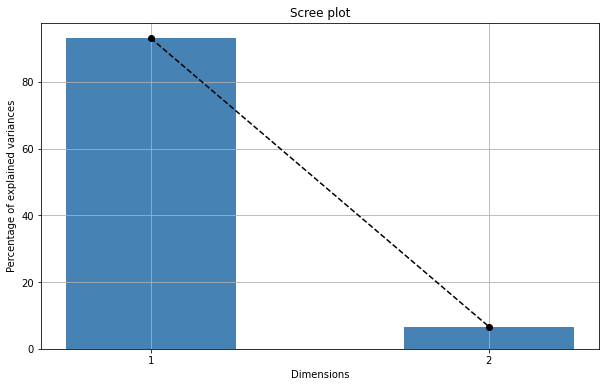

In [6]:
from scientisttools.pyplot import plot_eigenvalues
import matplotlib.pyplot as plt
fig,axe =plt.subplots(figsize=(10,6))
plot_eigenvalues(my_cmds,ax=axe)
plt.show()

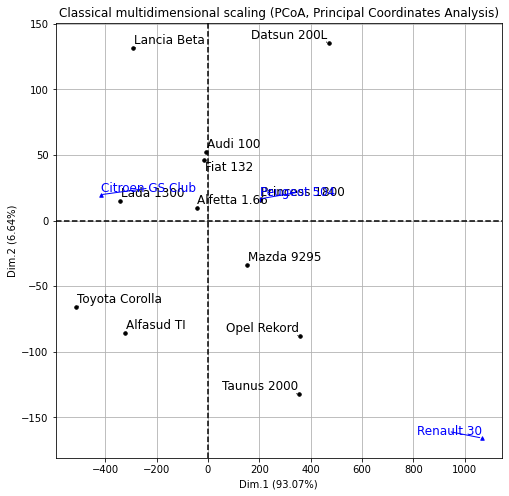

In [7]:
from scientisttools.pyplot import plotCMDS
fig, axe = plt.subplots(figsize=(8,8))
plotCMDS(my_cmds,repel=True,ax=axe)
plt.show()

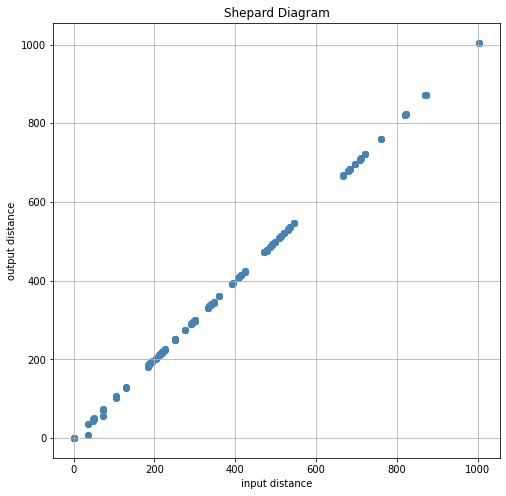

In [8]:
# shepard
from scientisttools.pyplot import plot_shepard
fig, axe = plt.subplots(figsize=(8,8))
plot_shepard(my_cmds,ax=axe)
plt.show()

## plotnine

### scree plot

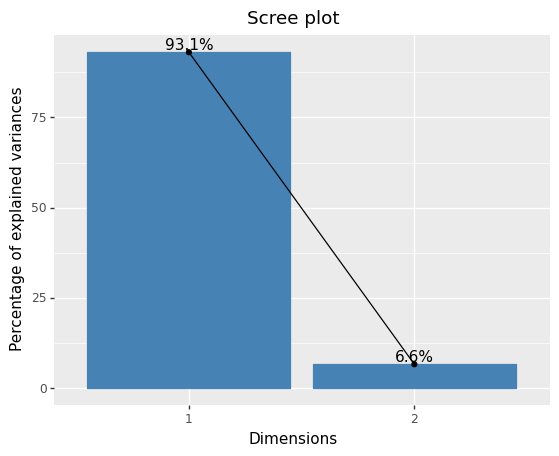

In [9]:
from scientisttools.ggplot import fviz_screeplot
p = fviz_screeplot(my_cmds,choice="proportion",add_labels=True)
print(p)

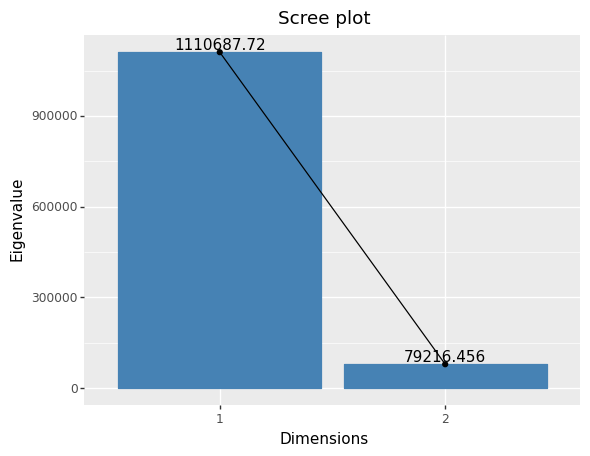

In [10]:
p = fviz_screeplot(my_cmds,choice="eigenvalue",add_labels=True)
print(p)

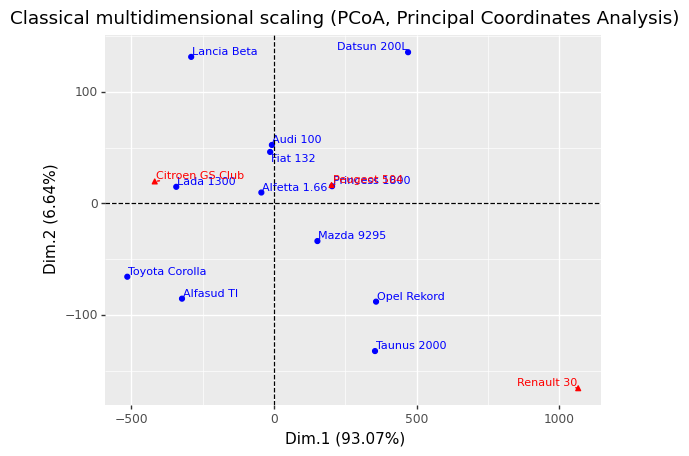

In [11]:
from scientisttools.ggplot import fviz_cmds
p = fviz_cmds(my_cmds,repel=True)
print(p)

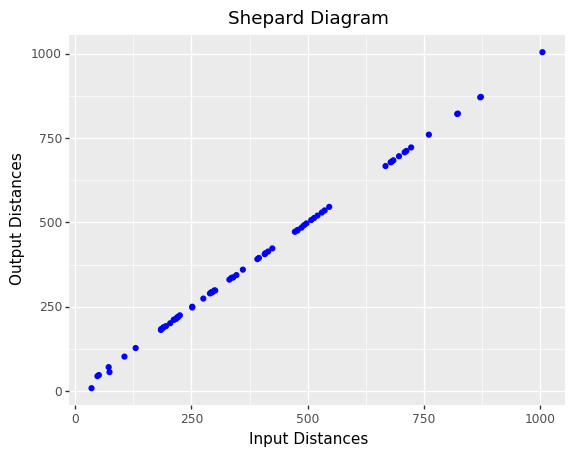

In [12]:
from scientisttools.ggplot import fviz_shepard
p = fviz_shepard(my_cmds)
print(p)